In [1]:
%matplotlib inline
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
base_dir = '/tmp/keras_acgan_data'

In [40]:
hist = pickle.load(open(os.path.join(base_dir, 'keras_acgan_history.pkl'), 'rb'))

## Plot source loss

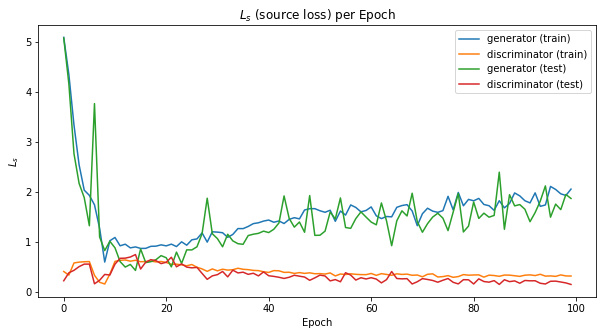

In [44]:
plt.figure(figsize=(10,5))    

for phase in ['train', 'test']:
    for model in ['generator', 'discriminator']:
        v = np.array(hist[phase][model])[:,1]
        plt.plot(v, label='%s (%s)' % (model, phase))

plt.legend()
plt.title(r'$L_s$ (source loss) per Epoch')
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')
plt.show()

The disciminator loss decreases over time as the discriminator gets better in separating fake and real images. At the same time the generator loss gets up because the generator produces images that are very similar to real images and the discriminator gets problems classifying them as fakes. 

## Plot classification loss

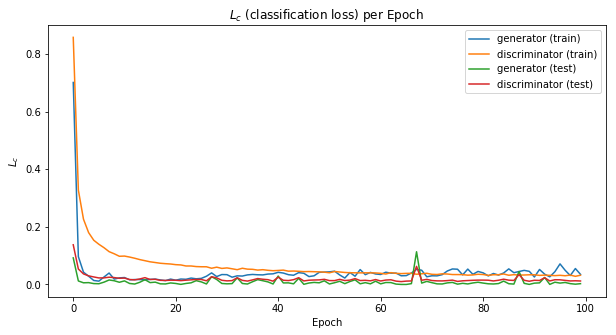

In [42]:
plt.figure(figsize=(10,5))    

for phase in ['train', 'test']:
    for model in ['generator', 'discriminator']:
        v = np.array(hist[phase][model])[:,2]
        plt.plot(v, label='%s (%s)' % (model, phase))

plt.legend()
plt.title(r'$L_c$ (classification loss) per Epoch')
plt.xlabel('Epoch')
plt.ylabel(r'$L_c$')
plt.show()

The discriminator gets better at predicting the correct image class. The generator gets better at generating images that look like the aux. class.